<a href="https://colab.research.google.com/github/davidagapitoq/data_science_for_business_2023/blob/main/Supervised_models/KNN/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PIMA INDIANS DIABETES DATABASE**

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir diagnósticamente si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. Se impusieron varias restricciones a la selección de estos casos de una base de datos más amplia. En concreto, todos los pacientes son mujeres de al menos 21 años y de ascendencia india pima.

### Variables

- **Pregnancies**: Número de embarazos (tasa de fecundidad 2 hijos por mujer)[1]
- **Glucose**: Concentración de glucosa en plasma después de 2 horas de una prueba de tolerancia a la glucosa oral (mg/dL)[2]:
  - Normal: Menos de 140 mg/dL
  - Prediabetes: De 140 mg/dL a 199 mg/dL
  - Diabetes: Mayor a 200 mg/dl
- **BloodPressure**: Presión arterial diastólica (mmHg)[3]:
  - Normal: Menos de 80 mmHg
  - Hipertensión Etapa 1: De 80 mmHg a 90 mmHg
  - Hipertensión Etapa 2: Mayor a 90 mmHg
  - Crisis hipertensiva: Mayor a 120 mmHg
- **SkinThickness**: Grosor del pliegue cutáneo del tríceps (mm)
- **Insulin**: Insulina sérica a las 2 horas (mU/ml)[4]:
  - Diabetes Tipo I: De 5 mU/ml a 20 mU/ml
  - Normal: De 20 mU/ml a 30 mU/ml
  - Resistencia a insulina: 30 mU/ml a 150 mU/ml
  - Diabetes Tipo II: Mayor a 150 mU/ml
- **BMI**: Índice de masa corporal (peso en kg/(altura en m)^2)[5]:
  - Peso insuficiente: Menor de 18.5
  - Normal: De 18.5 a 24.9
  - Sobrepeso: De 25 a 29.9
  - Obesidad: Mayor a 30
- **DiabetesPedigreeFunction**: Indica la probabilidad de tener Diabetes según antecedentes familiares [6]
- **Age**: Edad (años)
- **Outcome**: Target que indica si un paciente tiene diabetes o no:
  - 1: Paciente con diabetes
  - 0: Paciente sin diabetes

***Recuperado de Kaggle:*** https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?search=insulin

**Referencias**:
1. https://datos.bancomundial.org/indicator/SP.DYN.TFRT.IN?locations=IN
2. https://www.mayoclinic.org/es/tests-procedures/glucose-tolerance-test/about/pac-20394296
3. https://www.heart.org/en/news/2023/05/02/presion-arterial-que-significan-los-numeros-y-por-que-importan#:~:text=Seg%C3%BAn%20la%20American%20Heart%20Association,diast%C3%B3lica%20inferior%20a%2080%20mmHg.
4. https://diabetesbien.com/cuanta-es-mucha-o-poca-insulina-en-la-diabetes/
5. https://www.cdc.gov/healthyweight/spanish/assessing/index.html#:~:text=Si%20su%20IMC%20es%20menos,dentro%20del%20rango%20de%20sobrepeso.
6. https://rpubs.com/MMARRES/618010#:~:text=Funci%C3%B3n%20pedigr%C3%AD%20de%20la%20diabetes,negativo%20al%20diagn%C3%B3stico%20de%20diabetes.

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})

### 1. Leyendo los datos

In [76]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 2. Análisis exploratorio

In [77]:
len(data)

768

In [78]:
data['Outcome'].value_counts(normalize=True) * 100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">
La proporción de pacientes que tienen diabetes es menor en el dataset. Para la evaluación de resultados se considerará un escenario aplicando estratificación y en el otro no.
</div>

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [95]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">
No se encuentran valores nulos en el dataset.
</div>

In [80]:
data['Outcome'] = data['Outcome'].astype('category')

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">
Se convirtió en categórica la variable Outcome ya que 0 y 1 no presentan una relación numérica en el contexto de la presencia de diabetes.
</div>

In [83]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [120]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [84]:
features_with_zero = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']
print(data[features_with_zero].isin({0}).sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">
Presencia de valores 0 en las variables Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin y BMI. De acuerdo al origen del dataset, los valores 0 indicarían datos perdidos, por lo que se le dará un tratamiento de missings a aquellas variables que hagan sentido no tener el valor 0 (features_with_zero). En este caso Pregnancies igual a 0 es posible ya que una paciente puede no tener embarazos.
</div>

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

<Figure size 1000x600 with 0 Axes>

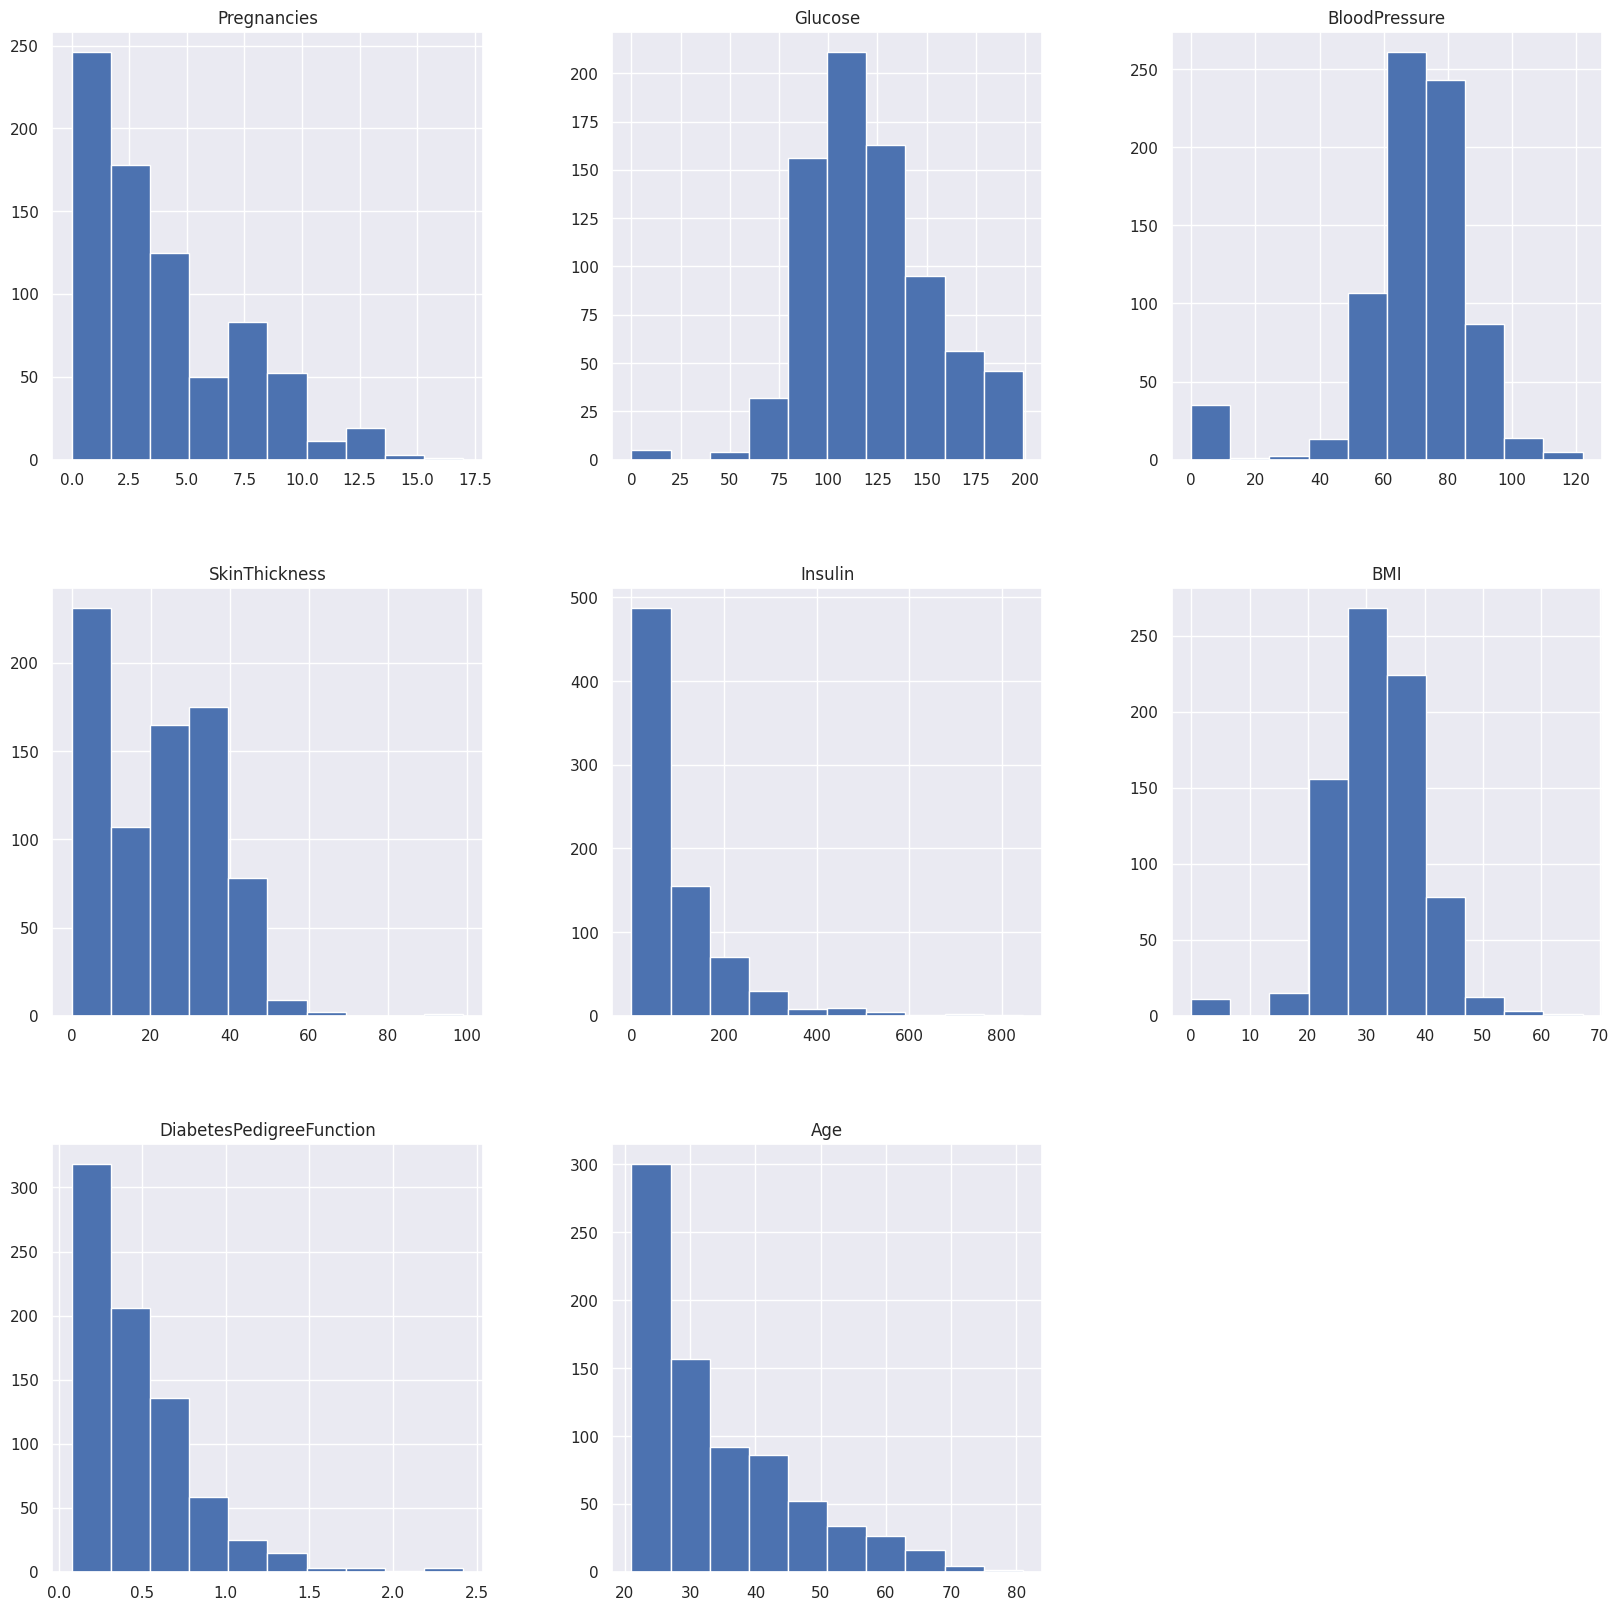

In [ ]:
### Histograma
data.hist(figsize = (20,20))

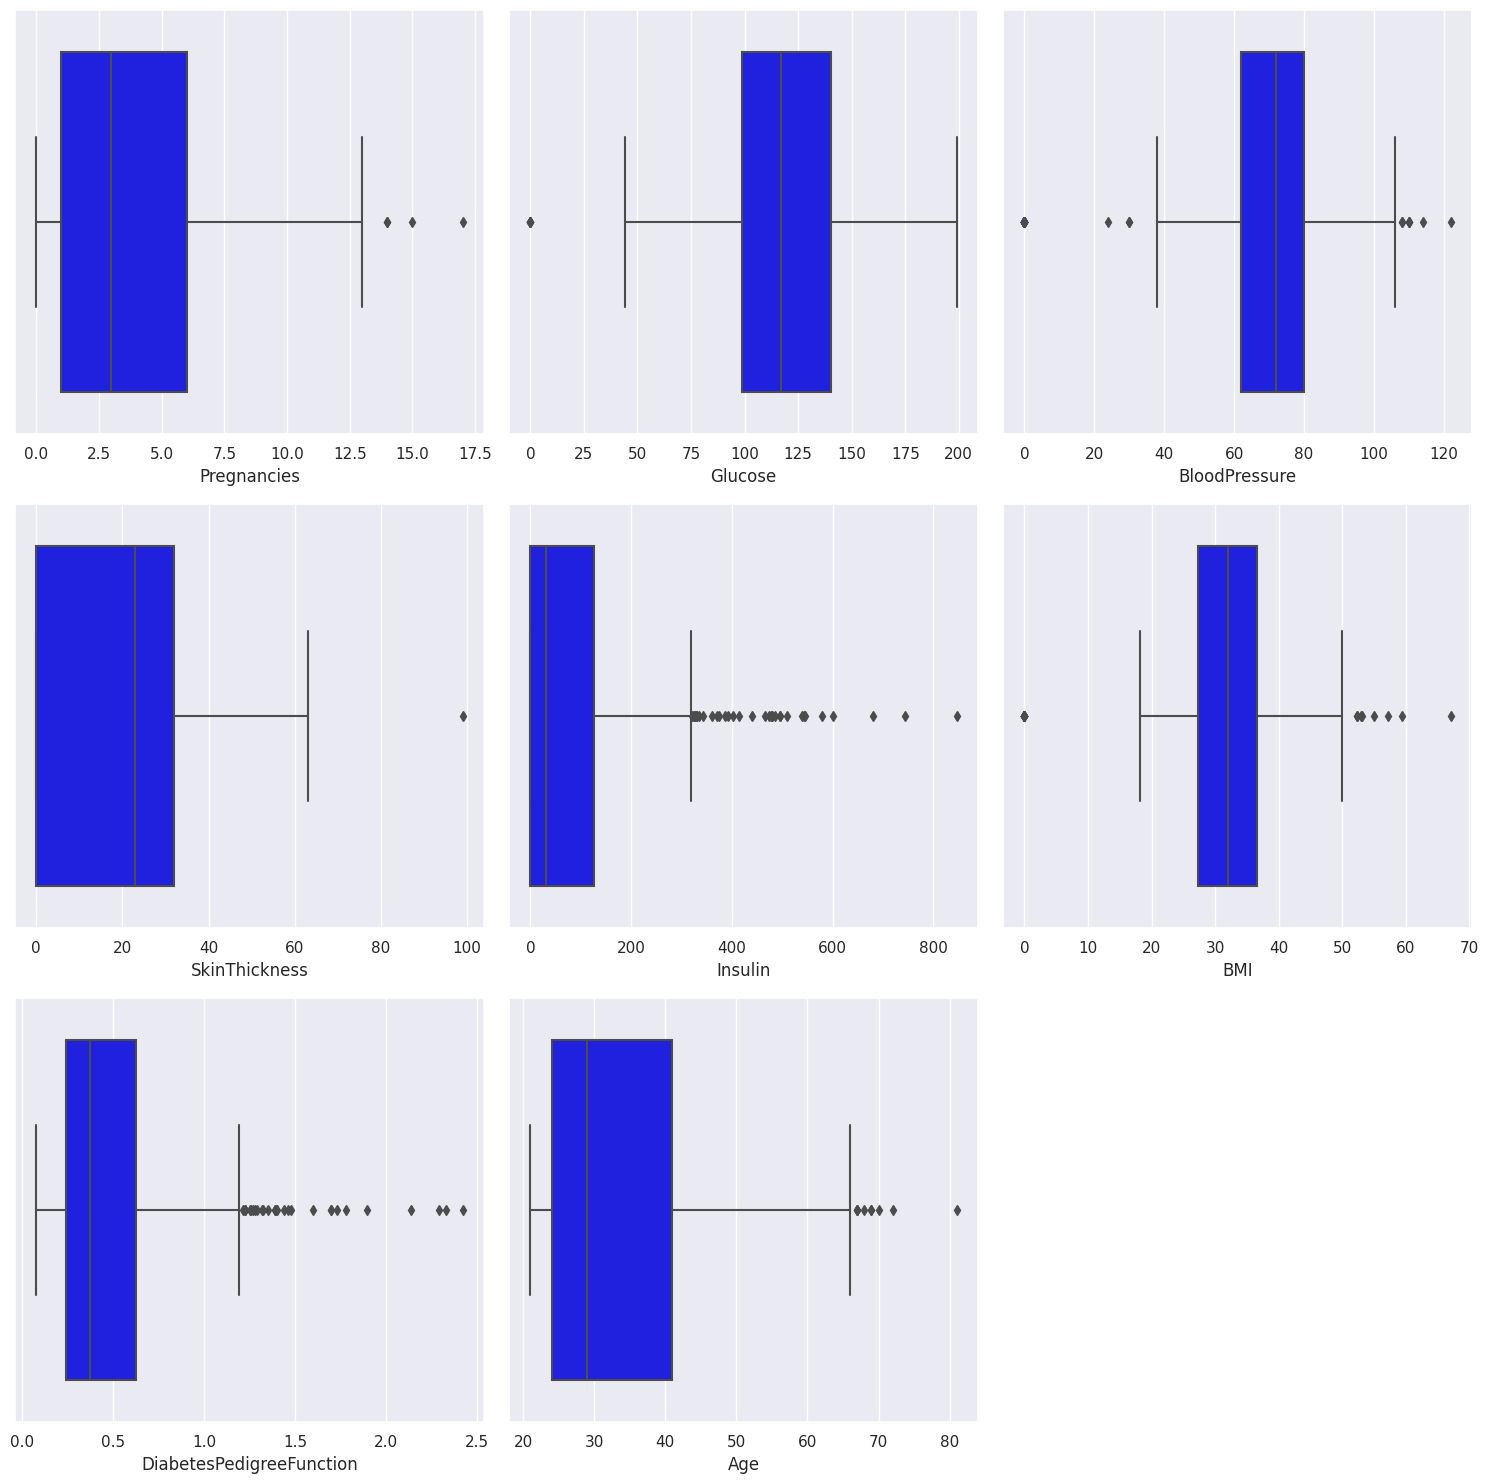

In [ ]:
### Diagrama de cajas
num_columns = len(data.columns)
num_rows = (num_columns + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
for i, column in enumerate(data.columns):
    if data[column].dtype != 'category':
        row = i // 3
        col = i % 3
        ax = axes[row, col]
        sns.boxplot(x=column, data=data, color='blue', ax=ax)
        ax.set_xlabel(column)
empty_ax = axes[-1, -1]
empty_ax.axis('off')
plt.tight_layout()
plt.show()

<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">
Presencia de valores atípicos en las variables del dataset, por lo que se le dará un tratamiento por outliers utilizando el IQR, ya que la mayoría de variables presentan una distribución asimétrica.
</div>

<Axes: >

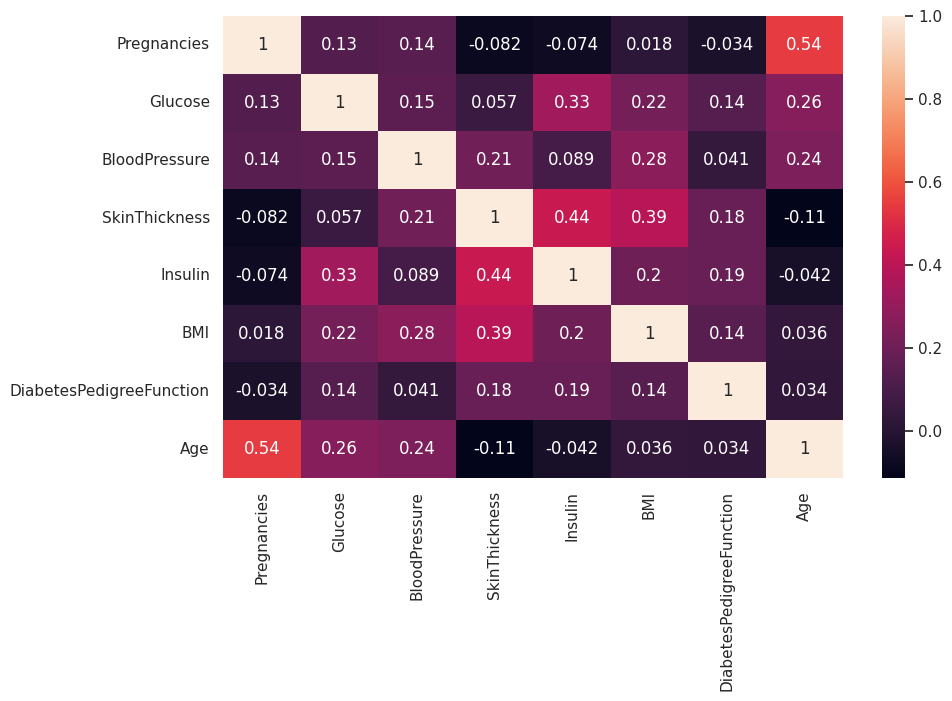

In [ ]:
### Correlación entre variables
correlation_matrix=data.drop('Outcome', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True)

<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">

- Se observa una correlación fuerte y positiva entre las variables Age y Pregnancies (0.54), lo cual hace sentido que a mayor edad mayor sea el número de embarazos que pueda haber tenido la paciente.

- Se observa una correlación moderada y positiva entre las variables Insulin y SkinThickness (0.44), lo cual hace sentido ya que a niveles altos de insulina podría favorecer la acumulación de grasa en el cuerpo, lo cual puede contribuir al aumento del grosor del pliegue cutáneo del tríceps.

- Se observa una correlación moderada y positiva entre las variables Glucose e Insulin (0.33), lo cual indica que el dataset podría contener en su mayoría pacientes con Diabetes Tipo II, que consiste en que los pacientes producen una cantidad alta en insulina para regular el nivel de glucosa en sangre, sin embargo, existe algún bloqueante que no permita el pase de la glucosa a las células. Por lo general esta relación es inversamente proporcional ya que a mayor cantidad de insulina menor nivel de glucosa en sangre y cuando se tiene una poca producción de insulina es que se presenta la Diabetes Tipo I.

No se aplicará una reducción de variables ya que las correlaciones entre variables no son determinantes y se consideran apriori importantes para la construcción del modelo.
</div>

<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">

**Resultado de análisis**

1. En base a la proporción de valores del target se considerará aplicar una estratificación al hacer el muestreo.
2. Se aplicará un tratamiento de missings por presencia de valores cero en las variables que corresponda de acuerdo a su significado.
3. Se aplicará un tratamiento de outliers por presencia de valores atipicos en las variables, se considerará el IQR.
4. No se aplicará una preselección de variables ya que se cuentan con pocas, no se evidencia correlaciones determinantes entre ellas y se consideran importantes en la predicción de diabetes.
</div>

### 3. Muestreo

In [112]:
# Muestreo sin stratify
train, test = train_test_split(data,
                               train_size = 0.7,
                               random_state = 123)

In [86]:
train['Outcome'].value_counts(normalize=True) * 100

0    66.480447
1    33.519553
Name: Outcome, dtype: float64

In [87]:
test['Outcome'].value_counts(normalize=True) * 100

0    61.904762
1    38.095238
Name: Outcome, dtype: float64

In [113]:
# Muestreo con stratify
train_s, test_s = train_test_split(data,
                                   stratify = data['Outcome'],
                                   train_size = 0.7,
                                   random_state = 123)

In [89]:
train_s['Outcome'].value_counts(normalize=True) * 100

0    65.176909
1    34.823091
Name: Outcome, dtype: float64

In [90]:
test_s['Outcome'].value_counts(normalize=True) * 100

0    64.935065
1    35.064935
Name: Outcome, dtype: float64

<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">
Se realizó el muestre con un 70% para train y 30% para test. Al aplicar stratify no se observa un cambio significativo en las proporciones de valores del target tanto para el train como para el test.
</div>

### 3. Tratamiento de missings

In [114]:
for feature in features_with_zero:
  train[feature]=train[feature].replace(0,train[feature].median())

In [115]:
print(train[features_with_zero].isin({0}).sum())

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">
Se reemplazaron los valores cero por la mediana en cada variable que hace sentido no tener ceros.
</div>

### 4. Tratamiento de outliers

In [116]:
# Utilizando el rango intercuartílico (IQR)
predictors = train.drop('Outcome', axis=1)
q1 = predictors.quantile(0.25)
q3 = predictors.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
predictors = predictors.clip(lower_bound, upper_bound, axis=1)
train = pd.concat([predictors, train['Outcome']], axis=1)

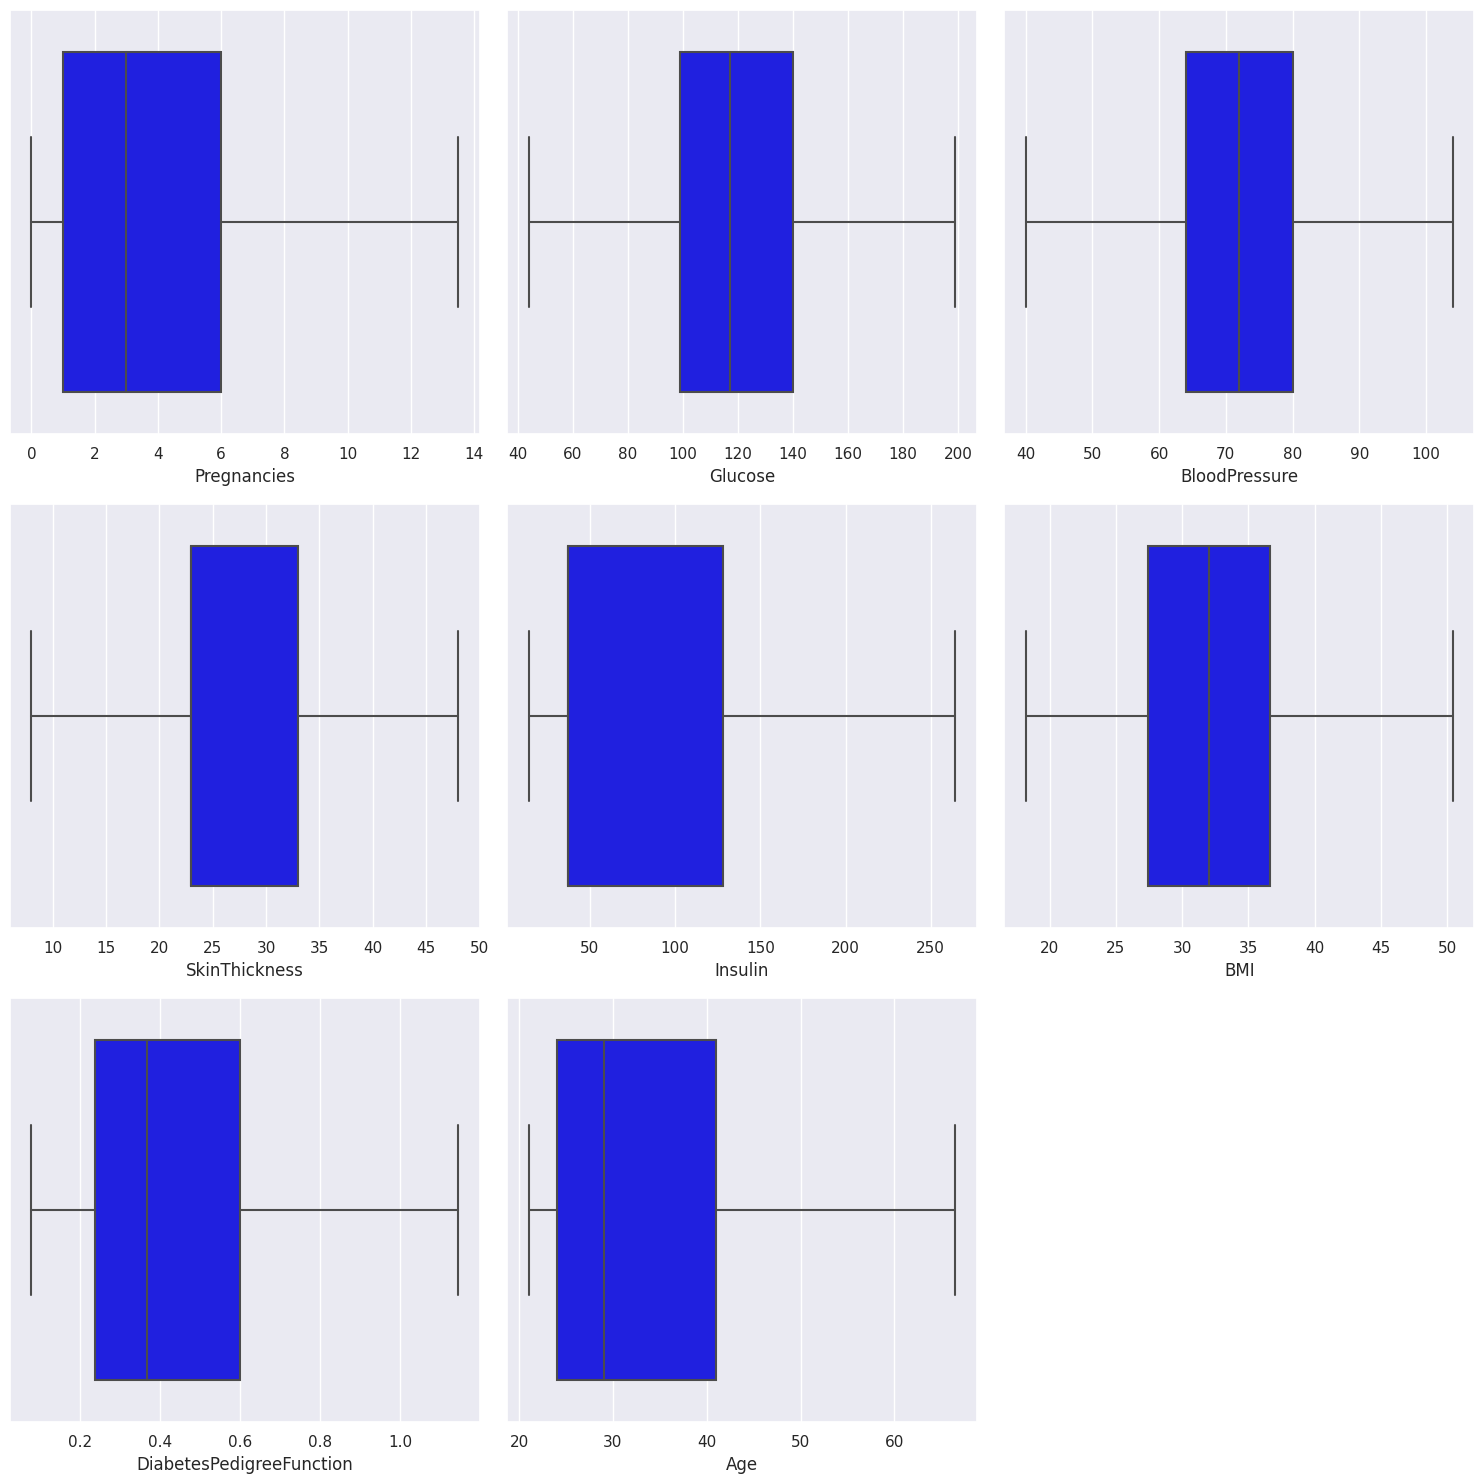

In [117]:
### Diagrama de cajas luego del tratamiento
num_columns = len(train.columns)
num_rows = (num_columns + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
for i, column in enumerate(train.columns):
    if train[column].dtype != 'category':
        row = i // 3
        col = i % 3
        ax = axes[row, col]
        sns.boxplot(x=column, data=train, color='blue', ax=ax)
        ax.set_xlabel(column)
empty_ax = axes[-1, -1]
empty_ax.axis('off')
plt.tight_layout()
plt.show()

<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">
Se reemplazaron los valores atípicos usando el Rango Intercuartílico.
</div>

### 5. Pre-selección de variables

In [122]:
dfgini = pd.DataFrame({'feature': features,
                       'gini': [roc_auc_score(train.Outcome, train[col])*2-1 for col in features]})

dfgini['gini_abs'] = dfgini.gini.apply(lambda x: abs(x))

dfgini.sort_values(by = 'gini_abs', ascending = False)

,feature,gini,gini_abs
1,Glucose,0.534765,0.534765
7,Age,0.347121,0.347121
5,BMI,0.343417,0.343417
3,SkinThickness,0.215344,0.215344
0,Pregnancies,0.207407,0.207407
6,DiabetesPedigreeFunction,0.201899,0.201899
2,BloodPressure,0.194024,0.194024
4,Insulin,0.116853,0.116853


<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">
Se observa un GINI positivo para todas las variables con respecto al target, lo cual hace sentido ya que un nivel alto de cada una de estas variables contribuye o tiene implicancia en el desarrollo de diabetes en un paciente. Además como el GINI Absoluto es mayor a 0.05 en todas las variables, ninguna se descarta.
</div>

### 6. Estandarización de datos

In [123]:
scaler = StandardScaler()
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns
train[numeric_columns] = scaler.fit_transform(train[numeric_columns])

In [124]:
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
429,-0.849429,-0.854765,0.837195,-0.268552,1.222034,0.389076,-0.768151,0.831137,1
524,-0.244063,0.131856,-1.237760,-0.501529,-0.720386,-0.123054,-1.061772,-0.795895,0
212,0.966669,1.907772,1.961128,0.430378,-0.720386,0.268575,-1.015222,2.286903,0
558,2.177401,-0.591666,-0.373196,1.478773,-0.720386,2.076092,-1.151290,0.745504,0
66,-1.152112,-0.394342,1.355933,0.313890,-0.720386,0.012510,1.459067,0.402971,1
...,...,...,...,...,...,...,...,...,...
98,0.663986,-0.920540,-1.929412,0.313890,-0.353635,-0.559870,-0.327721,-0.881528,0
322,-1.152112,0.098968,-0.200283,-0.850994,-0.720386,-0.755684,-0.692956,0.231704,1
382,-0.849429,-0.394342,-1.064847,-2.248855,1.249201,-1.056937,1.788495,-1.052795,0
365,0.361303,-0.723215,-1.583586,0.080913,-0.095551,0.238450,0.184325,-0.282095,0


<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">
Se realizó una estandarización de los datos ya que las escalas entre las variables eran muy diferentes.
</div>

### 7. KNN

In [131]:
x_train = train[numeric_columns]
y_train = train.Outcome

# Crear un objeto KNeighborsRegressor
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [132]:
# Realizar predicciones en el conjunto de prueba
y_train_pred = knn.predict(x_train)

### 8. Performance

Text(0, 0.5, 'Eje Y')

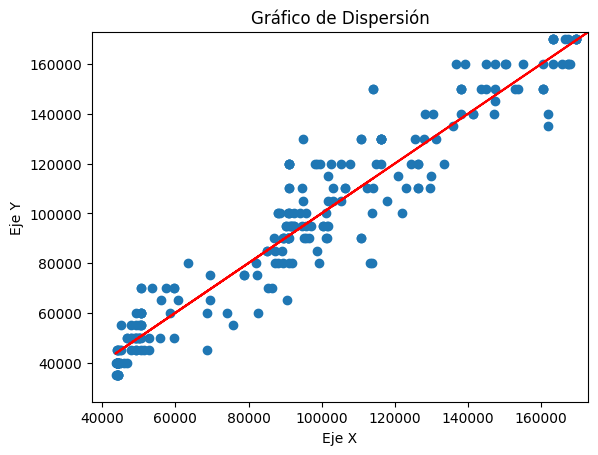

In [ ]:
# Crear el gráfico de dispersión
plt.scatter(y_test_pred, y_test)
plt.plot(y_test_pred, y_test_pred, color='red')

# Establecer el límite del eje Y como el máximo valor en el eje X
plt.xlim(plt.xlim()[0], np.max(y_test_pred))
plt.ylim(plt.ylim()[0], np.max(y_test_pred))

# Personalizar el gráfico
plt.title('Gráfico de Dispersión')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

In [ ]:
# Calcular las métricas de regresión
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)



In [ ]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)

MAE: 9392.081736909324
MSE: 170194338.0161771
RMSE: 13045.855204476902
R^2: 0.9183679193438627
